# Hierarchical Clustering

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv("user_profiles.csv", skipinitialspace=True, sep=',')

In [34]:
df.head()

,Unnamed: 0,name,lang,bot,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std,retweet_count_entropy
0,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,62.340909,14.015152,0.0,0.272727,0.0,0.0,0.0,0.0,0.037879,0.190903,1.609438,0.037879,0.190903,1.609438
1,2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,4,69.082645,15.041322,0.0,0.338843,0.0,0.0,0.0,0.0,0.049587,0.217090,1.791759,0.024793,0.155495,1.098612
2,137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,7,19.250000,5.250000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50,86.944871,18.689463,0.0,0.004885,0.0,0.0,0.0,0.0,0.130495,0.336848,5.231109,0.150035,1.326298,3.554720
4,2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,8,72.311246,14.582073,0.0,0.448996,0.0,0.0,0.0,0.0,0.053341,0.224712,5.267858,0.016772,0.142619,3.965939


In [35]:
cat_feature = df[['name','lang','created_at', 'bot']]
del df['name']
del df['lang']
del df['created_at']
del df['bot']
df.head()

,Unnamed: 0,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std,retweet_count_entropy
0,2353593986,76,62.340909,14.015152,0.0,0.272727,0.0,0.0,0.0,0.0,0.037879,0.190903,1.609438,0.037879,0.190903,1.609438
1,2358850842,4,69.082645,15.041322,0.0,0.338843,0.0,0.0,0.0,0.0,0.049587,0.217090,1.791759,0.024793,0.155495,1.098612
2,137959629,7,19.250000,5.250000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,466124818,50,86.944871,18.689463,0.0,0.004885,0.0,0.0,0.0,0.0,0.130495,0.336848,5.231109,0.150035,1.326298,3.554720
4,2571493866,8,72.311246,14.582073,0.0,0.448996,0.0,0.0,0.0,0.0,0.053341,0.224712,5.267858,0.016772,0.142619,3.965939


In [36]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [37]:
scaler = StandardScaler()
scaler.fit(df.values)

StandardScaler()

In [38]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df.values)

In [39]:
X[:5]

array([[0.74359032, 0.26116838, 0.24521037, 0.09406142, 0.        ,
        0.27272727, 0.        , 0.        , 0.        , 0.        ,
        0.03787879, 0.38180616, 0.1960894 , 0.00189394, 0.01909031,
        0.19655198],
       [0.74525164, 0.0137457 , 0.27306878, 0.10094847, 0.        ,
        0.33884298, 0.        , 0.        , 0.        , 0.        ,
        0.04958678, 0.43417936, 0.21830294, 0.00123967, 0.01554949,
        0.1341676 ],
       [0.043385  , 0.02405498, 0.06714876, 0.0352349 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.14709481, 0.17182131, 0.34687963, 0.12543264, 0.        ,
        0.00488486, 0.        , 0.        , 0.        , 0.        ,
        0.13049546, 0.67369547, 0.63734358, 0.00750174, 0.13262981,
        0.43411874],
       [0.81245306, 0.02749141, 0.28641011, 0.09786626, 0.        ,
        0.44899643, 0.        , 

In [40]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

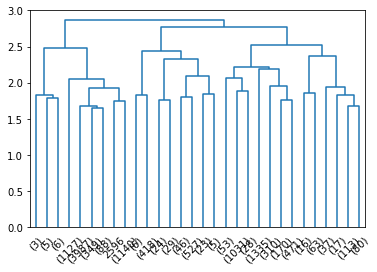

In [45]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.0, truncate_mode='lastp')

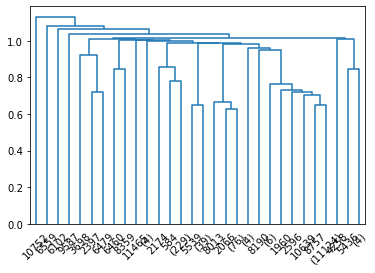

In [43]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.2, truncate_mode='lastp')

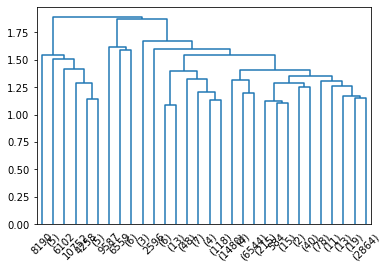

In [20]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.4, truncate_mode='lastp')

In [21]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([3, 3, 1, ..., 1, 3, 2], dtype=int64)

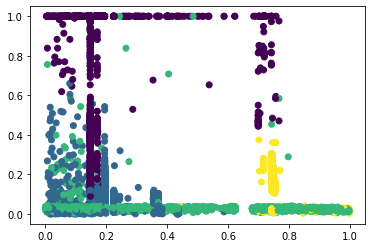

In [22]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_)

# dbscan

In [48]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [24]:
dbscan = DBSCAN(eps=0.15, min_samples=3)
dbscan.fit(X)

DBSCAN(eps=0.15, min_samples=3)

In [25]:
dbscan.labels_[:5]

array([ 0,  0,  1,  2, -1], dtype=int64)

In [26]:
np.unique(dbscan.labels_, return_counts=True)

(array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
         12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
         25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
         38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
         51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
         64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
         77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
         90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102],
       dtype=int64),
 array([2042, 3339,  997,  702, 1650,  149,  383,  220,   46,   43,   36,
         563,  138,   85,  417,   55,    4,    4,   13,   11,   63,    4,
           3,    7,   20,    6,   14,    6,    4,   37,    3,   59,    8,
           3,   17,   54,    4,    3,    6,    6,    4,    7,   19,    6,
           7,    8,    3,    3,   17,    4,    8,    3,    4,    3,    3,
           3,    4,    4

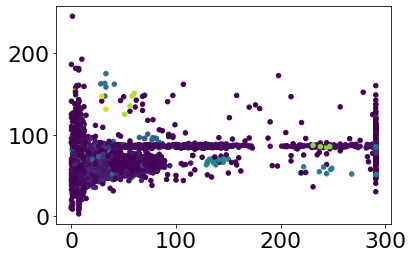

In [46]:
plt.scatter(df['statuses_count'], df['avg_length'], c=dbscan.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [49]:
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

Silhouette 0.009345640465860863


In [29]:
from scipy.spatial.distance import pdist, squareform

In [30]:
dist = pdist(X, 'euclidean') #pair wise distance
print (dist)
dist = squareform(dist) #distance matrix given the vector dist
print()
print(dist)

[0.27146602 0.93846652 0.89704697 ... 0.96447976 1.59574398 1.28047713]

[[0.         0.27146602 0.93846652 ... 0.88912966 0.22441482 1.37111036]
 [0.27146602 0.         0.95453127 ... 0.86865869 0.19139945 1.35323593]
 [0.93846652 0.95453127 0.         ... 0.39575365 1.04327517 1.7027918 ]
 ...
 [0.88912966 0.86865869 0.39575365 ... 0.         0.96447976 1.59574398]
 [0.22441482 0.19139945 1.04327517 ... 0.96447976 0.         1.28047713]
 [1.37111036 1.35323593 1.7027918  ... 1.59574398 1.28047713 0.        ]]


In [31]:
k = 3
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

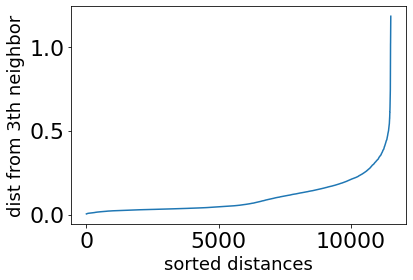

In [32]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()